valores infinitos por coluna após substituição:
id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64
id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int6

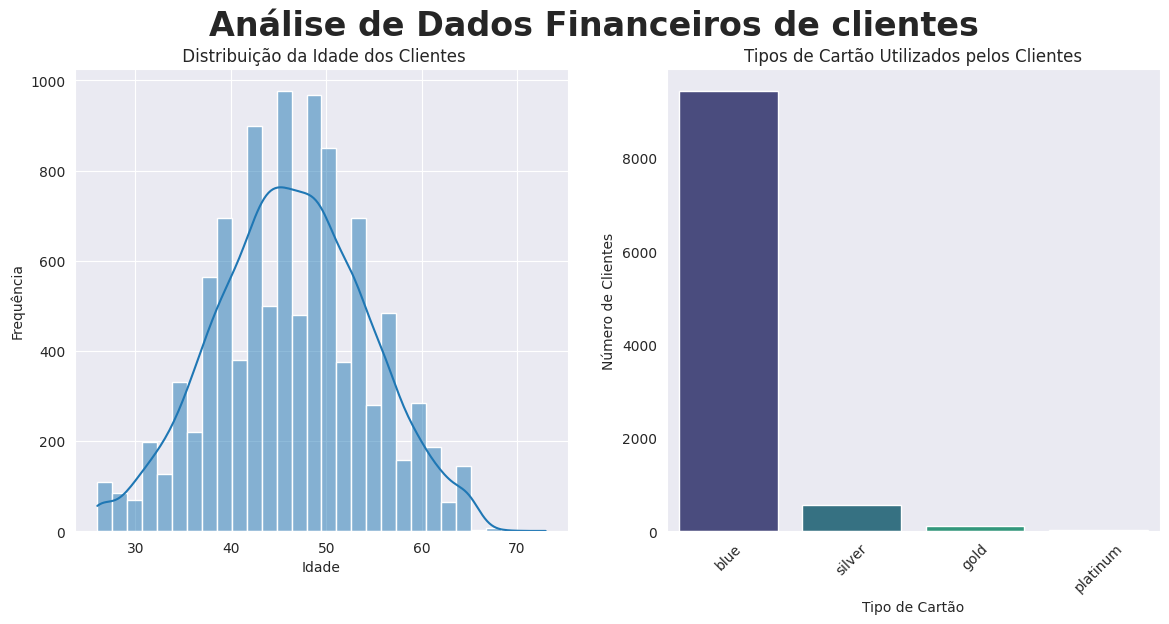


 CONCLUSÃO DOS INSIGHTS

-A maioria dos clientes está concentrada  em uma faixa etária  especifica.
-A distribuição dos tipos de cartão indica que alguns são mais populares  que outros  ,
sendo válido reavaliar as estrategias de marketing especificas para determinados cliente .
- essas análises podem ser usadas para identificar  clientes ccom maior risco de 
nadimplência e ajudar, nas tomadas de decisões futuras.



In [10]:

                
                #ANÁLISE DE DADOS FINANCEIROS DE CLIENTES 

#OBJETIVO:ENCONTRAR INSIGHTS ÚTEIS PARA IDENTIFICAR PADRÕES NOS DADOS.
#:ESTE PROJETO ANALISA UM CONJUNTO DE DADOS DE CLIENTES PARA ENTENDER MELHOR SEUS PADRÕES DE TRANSAÇÕES FINANCEIRAS E INADIMPLÊSCIA


#importação das bibliotecas necessarias 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore") #ignorando avisos desnecessarios
#configurações gerais para vizualização
sns.set_style("dark")
plt.rcParams["figure.figsize"] =(10,8)

#carregamento do dataset
df = pd.read_csv("/kaggle/input/conjunto-dedados-projeto-final/Python_M10_support material.csv")
df.head() #exibindo primeiras linhas do dataset
df.replace([np.inf,-np.inf],np.nan, inplace=True)
#verificando se ainda resta valores infinitos
print("valores infinitos por coluna após substituição:")
print((df==np.inf).sum())
print((df==np.inf).sum())
#verificando os valores ausentes 
print("valores auentes por coluna após conversao:")
print(df.isnull().sum()) 
#ANÁLISE EXPLORATÓRIA
#informações gerais sobre dados
print (df.info())
#estatísticas descritivas das colunas numéricas
print(df.describe())


#LIMPEZA E TRANSFORMAÇÃO DE DADOS
#Ajuste da coluna de faixa salarial para remover inconsistencias presentes
df['salario_anual'] = df ['salario_anual'].str.replace("menos que", "0",regex=True)
df['salario_anual'] = pd.to_numeric(df['salario_anual'], errors='coerce')
#converção para o formato numérico
df['limite_credito'] = df['limite_credito'].astype(str).str.replace(',' , '',)
df['limite_credito'] = pd.to_numeric(df['limite_credito'],errors='coerce')

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(str).str.replace(',', '')
df['valor_transacoes_12m'] = pd.to_numeric(df['valor_transacoes_12m'],errors= 'coerce')

#criando figuras para os graficos 
fig, axes = plt.subplots (1, 2, figsize=(14, 6)) #criando espaço entre os graficos


#1: DISTRIBUIÇÃO DE IDADE DOS CLIENTES
sns.histplot(df["idade"], bins=30, kde=True, ax=axes[0])
axes[0].set_title(" Distribuição da Idade dos Clientes")
axes[0].set_xlabel("Idade")
axes[0].set_ylabel("Frequência")
axes[0].grid(True)
#2:DISTRIBUIÇÃO DE TIPOS DE CARTÃO
sns.countplot(x=df["tipo_cartao"], palette="viridis", order=df["tipo_cartao"].value_counts().index, ax=axes[1])
axes[1].set_title("Tipos de Cartão Utilizados pelos Clientes")
axes[1].set_xlabel("Tipo de Cartão")
axes[1].set_ylabel("Número de Clientes")
axes[1].tick_params(axis='x', rotation=45)
#TITULO DO PROJETO PARA OS GRAFICOS
fig.suptitle("Análise de Dados Financeiros de clientes ", fontsize = 24 , fontweight='bold' )

plt.show() #exibindo grafcos 

#CONCLUSÃO E INSIGHTS COM BASE NOS GRÁFICOS
print("\n CONCLUSÃO DOS INSIGHTS")
print("""
-A maioria dos clientes está concentrada  em uma faixa etária  especifica.
-A distribuição dos tipos de cartão indica que alguns são mais populares  que outros  ,
sendo válido reavaliar as estrategias de marketing especificas para determinados cliente .
- essas análises podem ser usadas para identificar  clientes ccom maior risco de 
nadimplência e ajudar, nas tomadas de decisões futuras.
""")
                                                    